# Box-Muller

In [886]:
rng = np.random.RandomState(seed=42)
u1s = rng.uniform(size=1000)
u2s = rng.uniform(size=1000)
ss = -np.log(u1s)
thetas = 2*pi*u2s
rs = np.sqrt(2*ss)
xs = rs * np.cos(thetas)
ys = rs * np.sin(thetas)

In [887]:
def update(i, fig, s_axcenter, s_axbottom, s_axright, 
           theta_axcenter, theta_axbottom, theta_axright, xy_ax, verbose=False):
    if verbose and i%10==0:
        print(i)
    fig.suptitle(f'Sample {i+1}', fontsize=20)
    
    s_axcenter.scatter(u1s[i], 6, color='tab:green', marker='.', clip_on=False)
    s_axcenter.vlines(u1s[i], ss[i], 6, color='tab:green', linewidth=1, linestyles=':')
    s_axcenter.scatter(1, ss[i], color='tab:blue', marker='.', clip_on=False)
    s_axcenter.hlines(ss[i], u1s[i], 2*pi, color='tab:blue', linewidth=1, linestyles=':')
    
    theta_axcenter.scatter(u2s[i], 0, color='tab:brown', marker='.', clip_on=False)
    theta_axcenter.vlines(u2s[i], 0, thetas[i], color='tab:brown', linewidth=1, linestyles=':')
    theta_axcenter.scatter(1, thetas[i], color='tab:red', marker='.', clip_on=False)
    theta_axcenter.hlines(thetas[i], u2s[i], 2*pi, color='tab:red', linewidth=1, linestyles=':')
    
    
    u1, u2, theta, s = u1s[i], u2s[i], thetas[i], ss[i]
    rounded_u1, rounded_u2, rounded_theta, rounded_s = np.floor(u1*10)/10, np.floor(u2*10)/10, np.floor(theta*10)/10, np.floor(s*10)/10

    u1_counts.setdefault(rounded_u1, 0)
    s_axbottom.add_artist(Rectangle((rounded_u1, u1_counts[rounded_u1]), 0.1, 1, facecolor='tab:green'))
    u1_counts[rounded_u1] += 1
    
    u2_counts.setdefault(rounded_u2, 0)
    theta_axbottom.add_artist(Rectangle((rounded_u2, u2_counts[rounded_u2]), 0.1, 1, facecolor='tab:brown'))
    u2_counts[rounded_u2] += 1

    s_counts.setdefault(rounded_s, 0)
    s_axright.add_artist(Rectangle((s_counts[rounded_s], rounded_s), 1, 0.1, facecolor='tab:blue'))
    s_counts[rounded_s] += 1
    
    theta_counts.setdefault(rounded_theta, 0)
    theta_axright.add_artist(Rectangle((theta_counts[rounded_theta], rounded_theta), 1, 0.1, facecolor='tab:red'))
    theta_counts[rounded_theta] += 1
    
    r, x, y = rs[i], xs[i], ys[i]
    xy_ax.scatter(x, y, color='tab:gray', marker='.')
    if xy_ax.artists:
        xy_ax.artists = []
    if xy_ax.patches:
        xy_ax.patches = []
    xy_ax.arrow(0, 0, x, y, head_width=0.3, head_length=0.3, length_includes_head=True, color='tab:blue', lw=2)
    xy_ax.add_patch(Arc((0, 0), 1, 1, theta1=0, theta2=theta*180/pi, edgecolor='tab:red', lw=2))

0
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
0


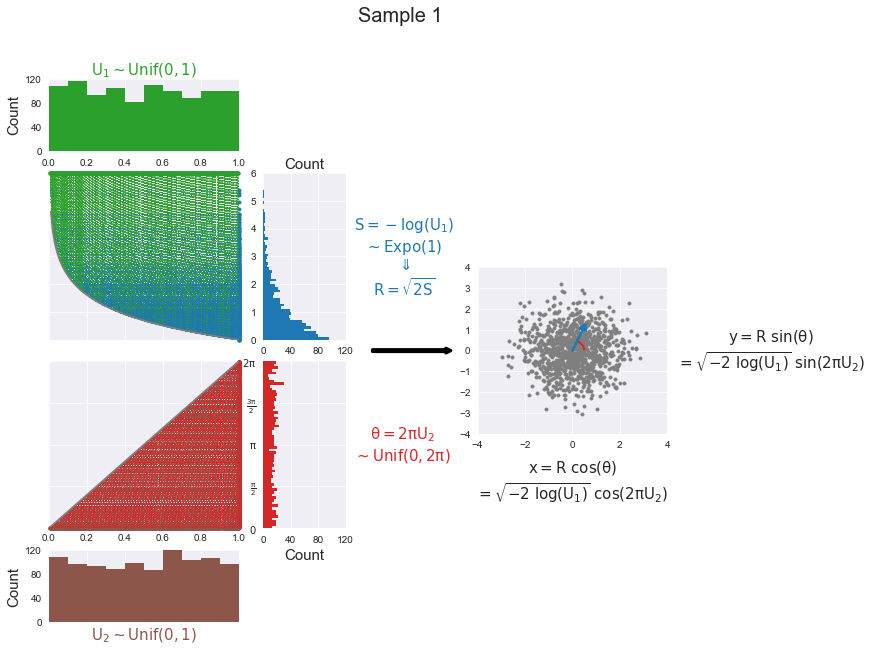

In [888]:
fig = plt.figure(figsize=(13, 10))
grid = plt.GridSpec(6, 7, wspace=0.3, hspace=0.3)
A = np.arange(0.01, 1.01, 0.01)

s_axcenter = fig.add_subplot(grid[1:3, :2])
s_axcenter.set_xlim(0, 1)
s_axcenter.set_ylim(0, 6)
plt.setp(s_axcenter.get_xticklabels(), visible=False)
plt.setp(s_axcenter.get_yticklabels(), visible=False)

s_axtop = fig.add_subplot(grid[0, :2], sharex=s_axcenter)
s_axtop.set_ylim(0, 120)
s_axtop.set_yticks(np.arange(0, 121, 40))
s_axtop.set_xlabel(r'$\mathrm{U_1 \sim Unif(0, 1)}$', fontsize=15, color='tab:green')
s_axtop.xaxis.set_label_position('top') 
s_axtop.set_ylabel('Count', fontsize=15)

s_axright = fig.add_subplot(grid[1:3, 2], sharey=s_axcenter)
s_axright.set_xlim(0, 120)
s_axright.set_xticks(np.arange(0, 121, 40))
s_axright.set_xlabel('Count', fontsize=15)
s_axright.xaxis.set_label_position('top')
s_axright.text(1.1, 0.5, r'$\mathrm{S = -log(U_1)}$' + '\n' r'$\mathrm{\sim Expo(1)}$' + '\n' + r'$\mathrm{\Downarrow}$' + '\n' + r'$\mathrm{R = \sqrt{2S}}$', fontsize=15, color='tab:blue', transform=s_axright.transAxes, va='center', multialignment='center')

theta_axcenter = fig.add_subplot(grid[3:5, :2])
theta_axcenter.set_xlim(0, 1)
theta_axcenter.set_ylim(0, 2*pi)
theta_axcenter.set_yticklabels([r'$\mathrm{0}$', r'$\mathrm{\frac{\pi}{2}}$', r'$\mathrm{\pi}$', r'$\mathrm{\frac{3\pi}{2}}$', r'$\mathrm{2\pi}$'], fontsize=20)
plt.setp(theta_axcenter.get_xticklabels(), visible=False)
plt.setp(theta_axcenter.get_yticklabels(), visible=False)

theta_axbottom = fig.add_subplot(grid[5, :2], sharex=theta_axcenter)
theta_axbottom.set_ylim(0, 120)
theta_axbottom.set_yticks(np.arange(0, 121, 40))
theta_axbottom.xaxis.tick_top()
theta_axbottom.set_xlabel(r'$\mathrm{U_2 \sim Unif(0, 1)}$', fontsize=15, color='tab:brown')
theta_axbottom.set_ylabel('Count', fontsize=15)

theta_axright = fig.add_subplot(grid[3:5, 2], sharey=theta_axcenter)
theta_axright.set_xlim(0, 120)
theta_axright.set_xticks(np.arange(0, 121, 40))
theta_axright.set_yticks([0, pi/2, pi, 3*pi/2, 2*pi])
theta_axright.text(1.1, 0.5, r'$\mathrm{\theta = 2 \pi U_2}$' + '\n' + r'$\mathrm{\sim Unif(0, 2\pi)}}$', fontsize=15, color='tab:red', transform=theta_axright.transAxes, va='center', multialignment='center')
theta_axright.set_xlabel('Count', fontsize=15)

xy_ax = fig.add_subplot(grid[2:4, 4:6])
xy_ax.set_xlim(-4, 4)
xy_ax.set_ylim(-4, 4)
xy_ax.text(0.5, -0.15, r'$\mathrm{x=R\ cos(\theta)}$' + '\n' + r'$\mathrm{=\sqrt{-2\ log( U_{1})} \ cos( 2\pi U_{2})}}$', transform=xy_ax.transAxes, fontsize=15, ha='center', va='top')
xy_ax.text(1.05, 0.5, r'$\mathrm{y=R\ sin(\theta)}$' + '\n' + r'$\mathrm{=\sqrt{-2\ log( U_{1})} \ sin( 2\pi U_{2})}}$', transform=xy_ax.transAxes, fontsize=15, ha='left', va='center', multialignment='center')

s_axcenter.plot(A, -np.log(A), color='tab:gray')
theta_axcenter.plot(A, 2*pi*A, color='tab:gray')

arrow_ax = fig.add_subplot(grid[2:4, 3])
arrow_ax.axis('off')
arrow_ax.annotate('', xy=(1, 0.5), xytext=(0, 0.5), xycoords='axes fraction', arrowprops=dict(arrowstyle='simple', lw=3))

u1_counts = {}
u2_counts = {}
theta_counts = {}
s_counts = {}

anim = FuncAnimation(fig, lambda i: update(i, fig, s_axcenter, s_axtop, s_axright, 
                                           theta_axcenter, theta_axbottom, theta_axright, xy_ax, verbose=True), 
                     frames=range(len(u1s)), interval=100)
anim.save('viz/box_muller.mp4', writer='ffmpeg')

# Central Limit Theorem

In [889]:
n_points = 1000
n_additions = 100
rng = np.random.RandomState(seed=24)
u1s = rng.uniform(size=(n_additions, n_points))
u2s = rng.uniform(size=(n_additions, n_points))

In [890]:
sum1s = np.cumsum(u1s, axis=0)
sum2s = np.cumsum(u2s, axis=0)

In [891]:
def plot_qq(ax, values, **kwargs):
    cum_probs = np.arange(1, len(values)) / len(values) 
    percentiles = norm().ppf(cum_probs)
    sorted_values = np.sort(values)[:-1]
    normalized_values = (sorted_values - sorted_values.mean()) / sorted_values.std()
    
    ax.scatter(percentiles, normalized_values, **kwargs)

In [899]:
def update(i, fig, xy_ax, x_ax, y_ax, qq_ax, max_xy, verbose=False):
    if verbose and i%10==0:
        print(i)
    fig.suptitle(f'Addition {i+1}', fontsize=20)
    
    sum1, sum2 = sum1s[i], sum2s[i]
    
    if xy_ax.collections:
        xy_ax.collections = []
    xy_ax.scatter(sum1, sum2, color='tab:gray', marker='.')
    xy_ax.scatter(sum1, [-10] * len(sum1), color='tab:blue', clip_on=False, marker='.')
    xy_ax.scatter([-10] * len(sum2), sum2, color='tab:green', clip_on=False, marker='.')
    
    if x_ax.patches:
        x_ax.patches = []
    x_ax.hist(sum1, bins=np.arange(-5, max_xy, 0.5), color='tab:blue')
    
    if y_ax.patches:
        y_ax.patches = []
    y_ax.hist(sum2, bins=np.arange(-5, max_xy, 0.5), color='tab:green', orientation='horizontal')
    
    if qq_ax.collections:
        qq_ax.collections = []
    plot_qq(qq_ax, sum1, color='tab:blue')
    plot_qq(qq_ax, sum2, color='tab:green')

0
0
10
20
30
40
50
60
70
80
90
0


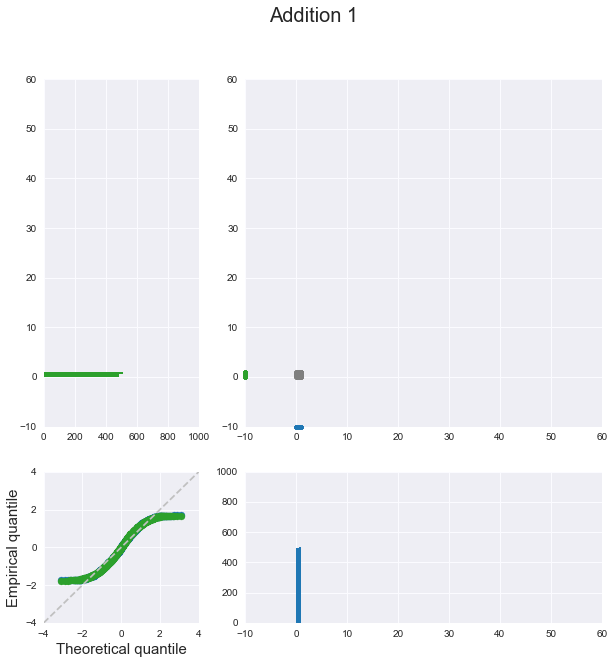

In [900]:
fig = plt.figure(figsize=(10, 10))
grid = plt.GridSpec(3, 3, wspace=0.3, hspace=0.3)
xy_ax = fig.add_subplot(grid[:2, 1:])
x_ax = fig.add_subplot(grid[2, 1:], sharex=xy_ax)
y_ax = fig.add_subplot(grid[:2, 0], sharey=xy_ax)
qq_ax = fig.add_subplot(grid[2, 0])

u1s = np.zeros(shape=10)
u2s = np.zeros(shape=10)

def roundup(x):
    return int(ceil(x / 10.0)) * 10

max_xy = roundup(n_additions/2 + 3*sqrt(n_additions/12))
xy_ax.set_xlim(-10, max_xy)
xy_ax.set_ylim(-10, max_xy)
xy_ax.set_xticks(np.arange(-10, max_xy+1, 10))
xy_ax.set_yticks(np.arange(-10, max_xy+1, 10))

x_ax.set_ylim(0, n_points)
y_ax.set_xlim(0, n_points)
qq_ax.set_xlim(-4, 4)
qq_ax.set_ylim(-4, 4)
qq_ax.set_xlabel('Theoretical quantile', fontsize=15)
qq_ax.set_ylabel('Empirical quantile', fontsize=15)

qq_ax.plot([-4, 4], [-4, 4], '--', color='silver')

anim = FuncAnimation(fig, lambda i: update(i, fig, xy_ax, x_ax, y_ax, qq_ax, max_xy, verbose=True), 
                     frames=range(len(sum1s)), interval=100)
anim.save('viz/clt.mp4', writer='ffmpeg')

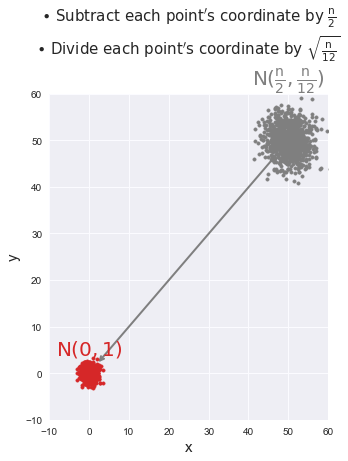

<Figure size 432x288 with 0 Axes>

In [917]:
fig, ax = plt.subplots(figsize=(5, 6))

ax.set_xlim(-max_xy, max_xy)
ax.set_ylim(-max_xy, max_xy)
ax.set_xticks(np.arange(-max_xy, max_xy+1, 10))
ax.set_yticks(np.arange(-max_xy, max_xy+1, 10))

unscaled1s, unscaled2s = sum1s[-1], sum2s[-1]
scaled1s, scaled2s = (sum1s[-1]-n_additions/2) / sqrt(n_additions/12), (sum2s[-1]-n_additions/2) / sqrt(n_additions/12)
ax.scatter(unscaled1s, unscaled2s, marker='.',  color='tab:gray', zorder=11)
ax.scatter(scaled1s, scaled2s, marker='.', color='tab:red', zorder=12)
ax.text(unscaled1s.mean(), unscaled2s.mean()+unscaled2s.std()*4, r'$\mathrm{N(\frac{n}{2}, \frac{n}{12})}$', color='tab:gray', ha='center', fontsize=20, zorder=13)
ax.text(scaled1s.mean(), scaled2s.mean()+scaled2s.std()*4, r'$\mathrm{N(0, 1)}$', color='tab:red', ha='center', fontsize=20, zorder=14)
ax.annotate('', xy=(scaled1s.mean()+scaled1s.std()*2, scaled2s.mean()+scaled2s.std()*2), xytext=(unscaled1s.mean()-unscaled1s.std()*1, unscaled2s.mean()-unscaled2s.std()*1), arrowprops=dict(arrowstyle='->', lw=2, color='tab:gray'), zorder=10)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_xlim(-10, max_xy)
ax.set_ylim(-10, max_xy)
ax.set_title(r"$\mathrm{\bullet\ Subtract\ each\ point's\ coordinate\ by\ \frac{n}{2}}$" + '\n' + r"$\mathrm{\bullet\ Divide\ each\ point's\ coordinate\ by\ \sqrt{\frac{n}{12}}}$", fontsize=15, pad=40)
plt.show()
plt.subplots_adjust(top=0.40)

# plt.tight_layout()
fig.savefig('viz/clt_scaling.png', bbox_inches='tight')

# Scaling

In [61]:
mean1, mean2, var1, var2, cov = 7, 9, 4, 3, 2
cov_mat = np.array([[var1, cov], [cov, var2]])

In [62]:
L_cholesky = np.linalg.cholesky(cov_mat)
transformed1s_cholesky, transformed2s_cholesky = np.array([mean1, mean2])[:, np.newaxis] + L_cholesky @ np.array([scaled1s, scaled2s])

In [63]:
U, S, V = svd(cov_mat)
L_svd = U @ sqrtm(np.diag(S))
L_svd

array([[-1.85882053, -0.73809637],
       [-1.45132321,  0.94533641]])

In [64]:
transformed1s_svd, transformed2s_svd = np.array([mean1, mean2])[:, np.newaxis] + L_svd @ np.array([scaled1s, scaled2s])

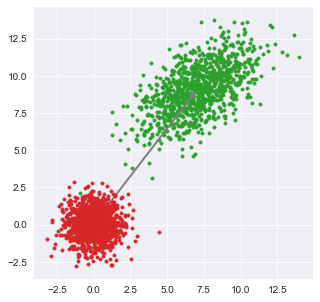

In [107]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(scaled1s, scaled2s, marker='.', color='tab:red', zorder=12)
ax.scatter(transformed1s_svd, transformed2s_svd, marker='.', color='tab:green', zorder=10)
ax.annotate('', xy=(transformed1s_svd.mean(), transformed2s_svd.mean()), xytext=(scaled1s.mean(), scaled2s.mean()), arrowprops=dict(arrowstyle='->', lw=2, color='tab:gray'), zorder=11)
ax.text(scaled1s.mean(), scaled2s.mean()+scaled2s.std()*4, r'$\mathrm{N(0, 1)}$', color='tab:red', ha='center', fontsize=20, zorder=14)
fig.savefig('viz/transform.png')

In [56]:
transformed1s_cholesky.mean(), transformed2s_cholesky.mean()

(6.931828030614899, 9.001058955694782)

In [57]:
np.cov(transformed1s_cholesky, transformed2s_cholesky)

array([[3.88066543, 2.00863681],
       [2.00863681, 2.96134815]])

In [58]:
transformed1s_svd.mean(), transformed2s_svd.mean()

(7.04501712858548, 9.072962549335648)

In [59]:
np.cov(transformed1s_svd, transformed2s_svd)

array([[3.94217551, 1.92985615],
       [1.92985615, 2.83643494]])

# MNIST

In [204]:
mnist_raw = pd.read_csv('digit-recognizer/train.csv')

In [551]:
mnist = mnist_raw.loc[mnist_raw['label'].isin([1, 7])]
X = mnist.loc[:, 'pixel0':].values
y = mnist['label']

## Sample from PCA space

In [560]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca1 = X_pca[y==1]
X_pca7 = X_pca[y==7]

In [561]:
mean1, cov1 = X_pca1.mean(axis=0), np.cov(X_pca1, rowvar=False)
mean7, cov7 = X_pca7.mean(axis=0), np.cov(X_pca7, rowvar=False)

In [562]:
U, S, V = svd(cov1)
L1 = U @ sqrtm(np.diag(S))

U, S, V = svd(cov7)
L7 = U @ sqrtm(np.diag(S))

In [563]:
def generate_point_box_muller(random_state):
    u1 = random_state.uniform()
    u2 = random_state.uniform()
    z1 = sqrt(-2*log(u1)) * cos(2*pi*u2)
    z2 = sqrt(-2*log(u1)) * sin(2*pi*u2)
    
    return z1, z2

In [737]:
def generate_digit(random_state, meanA, meanB, LA, LB, pca, percentA):
    genA = meanA + LA @ generate_point_box_muller(random_state)
    genB = meanB + LB @ generate_point_box_muller(random_state)
    gen_pca = percentA * genA + (1-percentA) * genB
    gen_original = pca.inverse_transform(gen_pca)
    return gen_pca, gen_original

In [738]:
gen_digits = {}

In [739]:
rng = np.random.RandomState(seed=42)

[]

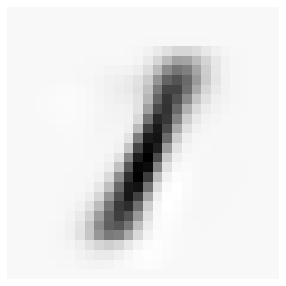

In [823]:
fig, ax = plt.subplots(figsize=(5, 5))
gen_pca, gen_original = generate_digit(rng, mean1, mean7, L1, L7, pca, percentA=1)
gen_original = gen_original.reshape(28, 28)
ax.imshow(gen_original)
ax.set_xticks([])
ax.set_yticks([])

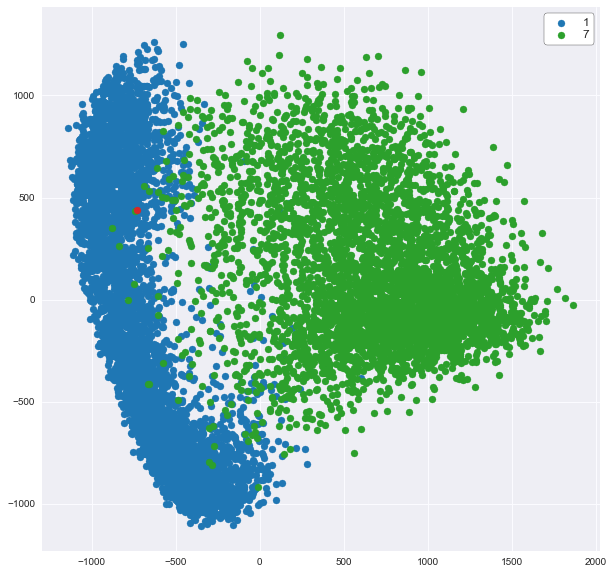

In [824]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(X_pca1[:, 0], X_pca1[:, 1], color='tab:blue', label='1')
ax.scatter(X_pca7[:, 0], X_pca7[:, 1], color='tab:green', label='7')
ax.scatter(gen_pca[0], gen_pca[1], color='tab:red')
ax.legend(**legend_opts)

In [826]:
gen_digits[1] = (gen_pca, gen_original)

In [ ]:
gen_digits

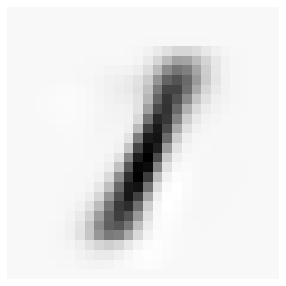

In [841]:
fig, ax = plt.subplots(figsize=(5, 5))
for i, (percent, points) in enumerate(gen_digits.items()):
    ax.imshow(points[1])
    ax.set_xticks([])
    ax.set_yticks([])
    fig.savefig(f'viz/mnist{percent}.png', bbox_inches = 'tight', pad_inches = 0)

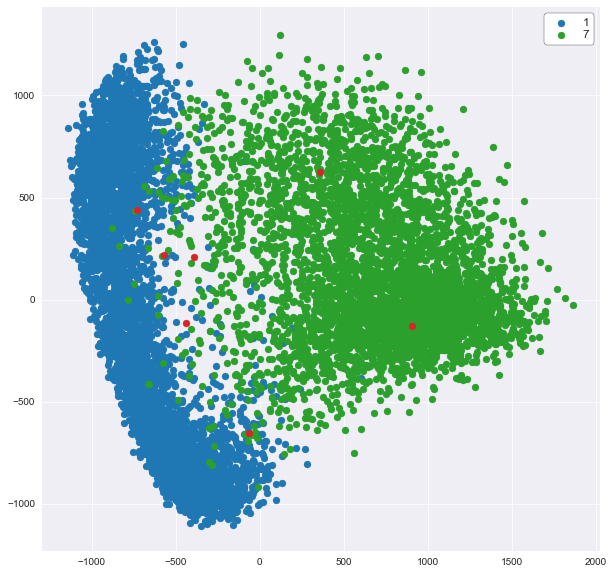

In [840]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(X_pca1[:, 0], X_pca1[:, 1], color='tab:blue', label='1')
ax.scatter(X_pca7[:, 0], X_pca7[:, 1], color='tab:green', label='7')
for percent, points in gen_digits.items():
    point_pca = points[0]
    ax.scatter(point_pca[0], point_pca[1], color='tab:red')
ax.legend(**legend_opts)
fig.savefig('viz/mnist.png')

## Sample directly from original space

In [842]:
mean1, cov1 = X[y==1].mean(axis=0), np.cov(X[y==1], rowvar=False)
mean7, cov7 = X[y==7].mean(axis=0), np.cov(X[y==7], rowvar=False)
U, S, V = svd(cov1)
L1 = U @ sqrtm(np.diag(S))

U, S, V = svd(cov7)
L7 = U @ sqrtm(np.diag(S))

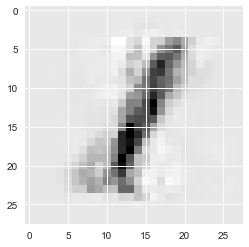

In [862]:
normal_samples = []
while len(normal_samples) < len(mean1):
    sample_pair = generate_point_box_muller(rng)
    normal_samples.append(sample_pair[0])
    normal_samples.append(sample_pair[1])

plt.imshow((mean1 + L1 @ np.array(normal_samples)).reshape(28, 28))

Sample too noisy!